<h1><center>Homework Assignment 02</center></h1>



<center>-By Vinay Kadam</center>

# 1. Connecting specific folders from google drive

#### Step 1: Mount the google drive to colab

In [ ]:
from google.colab import drive   
drive.mount('/content/drive', force_remount=True)  #mounting the specific folder from google drive

Mounted at /content/drive


#### Step 2: After running the above cell you will get a prompt message to permit the access of this notebook to your google drive

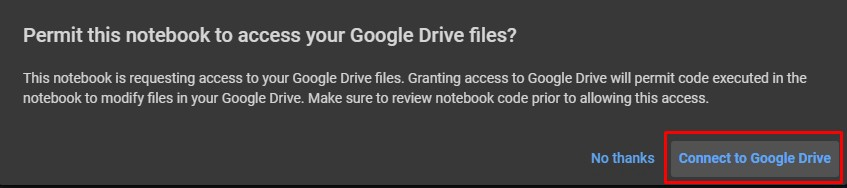

#### Step 3: Select the google account to mount into colab

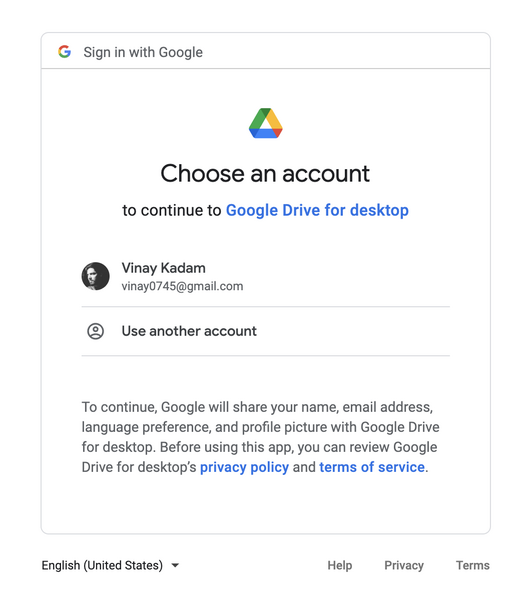

#### Step 4: Allow the colab to access the google drive  

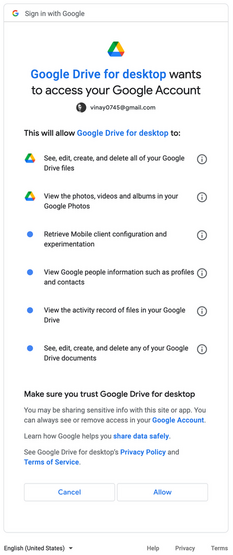

#### Step 5: Visualising the image

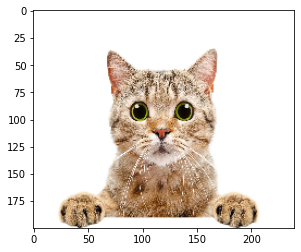

In [ ]:
import cv2
import matplotlib.pylab as plt

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/3683.jpg')   #read the image
image = cv2.resize(image, (240,200))      #resize the image
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     #convert bgr to rgb
plt.imshow(image1) #show the image using matplotlib

# 2. Connecting specific files from google drive

#### Step 1: Setup Google authentication for the drive

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import cv2
import matplotlib.pylab as plt

auth.authenticate_user()       #authenticate the user 
gauth = GoogleAuth()           #create a Google authentication instance
gauth.credentials = GoogleCredentials.get_application_default() #get credentials of your account
drive = GoogleDrive(gauth)    #connect the google drive

file_id = '18goJ0VQH49n-eEaBmoG7viOBgXB-6UnJ' #you can get the ID from https: //drive.google.com/file/d/ ** ID **/view?usp=sharing

#### Step 2: Download the file into colab

In [ ]:
download = drive.CreateFile({'id': file_id}) #create a file into colab using file ID
download.GetContentFile('3683.jpg') #get the image

#### Step 3: Visualising the image

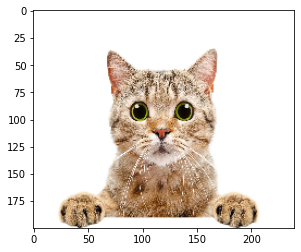

In [ ]:

image = cv2.imread('3683.jpg')   #read the image
image = cv2.resize(image, (240,200))      #resize the image
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     #convert bgr to rgb
plt.imshow(image1) #show the image using matplotlib

# 3. Using different types of filters from Scipy Library

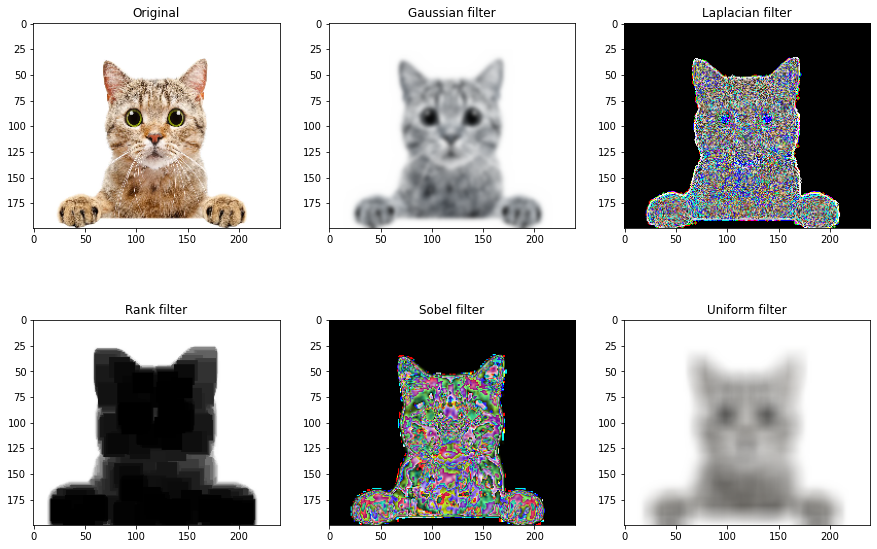

In [ ]:
from scipy import *

from scipy.ndimage import gaussian_filter
from google.colab.patches import cv2_imshow 
import matplotlib.pylab as plt
from scipy import ndimage

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/3683.jpg')   #read the image
image = cv2.resize(image, (240,200))      #resize the image
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     #convert bgr to rgb

gaussian = gaussian_filter(image, sigma=2) #gaussian filter
laplace = ndimage.laplace(image) #laplacian filter
rank = ndimage.rank_filter(image, rank=2, size=20) #rank filter
sobel = ndimage.sobel(image) #sobel filter
uniform = ndimage.uniform_filter(image, size=20) #uniform filter

processing = [image1, gaussian, laplace, rank, sobel, uniform]
title = ['Original', 'Gaussian filter', 'Laplacian filter', 'Rank filter', 'Sobel filter', 'Uniform filter']

fig = plt.figure(figsize=[15,10])  #specify the figure size

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(title[i], fontdict={'fontsize': 12})
  plt.imshow(processing[i]) #show the each image using matplotlib

# 4. Histogram equalization using Pillow library

Text(0.5, 1.0, 'Equalized Image')

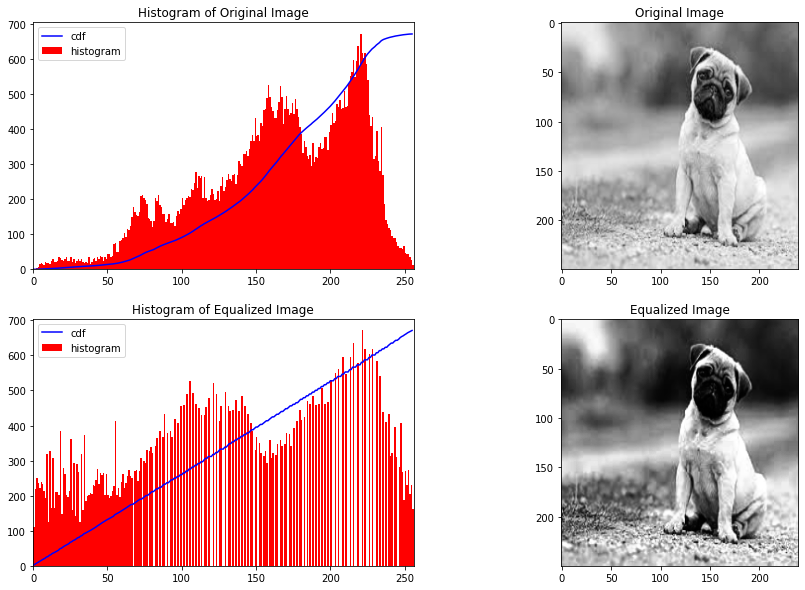

In [ ]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/dog.png')   #read the image
image = cv2.resize(image, (240,250))      #resize the image
img_filename = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert the original image to grayscale

equ = cv2.equalizeHist(img_filename) #equalizing the histogram

plt.figure(figsize=[15,10])  #specify the figure size

plt.subplot(2,2,1) #Initialize the subplot figure position
hist,bins = np.histogram(img_filename.flatten(),256,[0,256])
cdf = hist.cumsum()        #cumulative distribution function for original image
cdf_normalized = cdf * float(hist.max()) / cdf.max()  #Normalizing the cdf
plt.plot(cdf_normalized, color = 'b') #plot the line of cumulative function
plt.hist(img_filename.flatten(),256,[0,256], color = 'r') #histogram of original image with 256 bins 
plt.xlim([0,256]) #set the x axis limit
plt.legend(('cdf','histogram'), loc = 'upper left') #set the info of the graph
plt.title('Histogram of Original Image', fontdict={'fontsize': 12})

plt.subplot(2,2,2)
plt.imshow(img_filename, cmap='gray')  #show the original image
plt.title('Original Image', fontdict={'fontsize': 12})

plt.subplot(2,2,3)
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()   #cumulative distribution function for equalized image
cdf_normalized = cdf * float(hist.max()) / cdf.max() #Normalizing the cdf
plt.plot(cdf_normalized, color = 'b')   #plot the line of cumulative function
plt.hist(equ.flatten(),256,[0,256], color = 'r')       #histogram of equalized image with 256 bins
plt.xlim([0,256])  #set the x axis limit
plt.legend(('cdf','histogram'), loc = 'upper left')  #set the info of the graph
plt.title('Histogram of Equalized Image', fontdict={'fontsize': 12})


plt.subplot(2,2,4)
plt.imshow(equ, cmap='gray') #show the histogram equalized image
plt.title('Equalized Image', fontdict={'fontsize': 12})

# 5. Negative Image transformation using Pillow library

Text(0.5, 1.0, 'Negative Transformation')

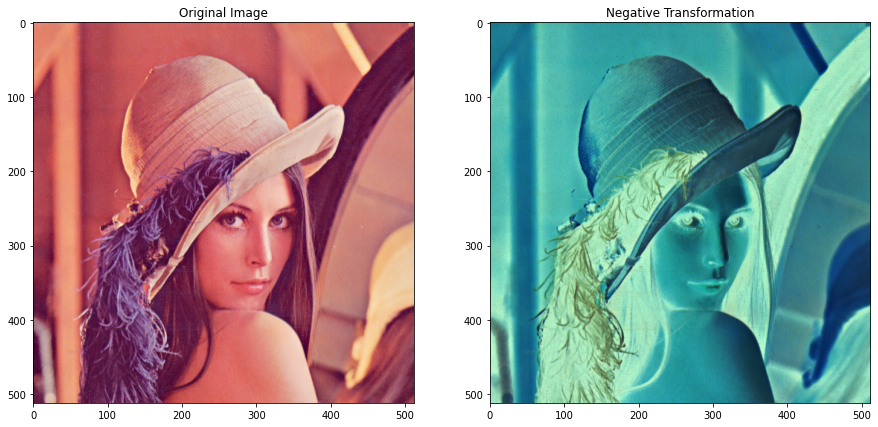

In [ ]:
from PIL import Image
image=Image.open("/content/drive/MyDrive/Colab Notebooks/Data/Lenna.png") #read the image from pillow 


plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')

w,h=image.size     # get the width and height of an image
for i in range(w):
    for j in range(h):
        r,g,b=image.getpixel((i,j)) #get the pixel values of the image
        r=255-r    #negate the red pixel values
        g=255-g    #negate the green pixel values
        b=255-b    #negate the blue pixel values
        image.putpixel((i,j),(r,g,b))     #modify the image with new pixel values


plt.subplot(1,2,2)
plt.imshow(image)
plt.title('Negative Transformation', fontdict={'fontsize': 12})

# 6. Power Law (Gamma) transformation

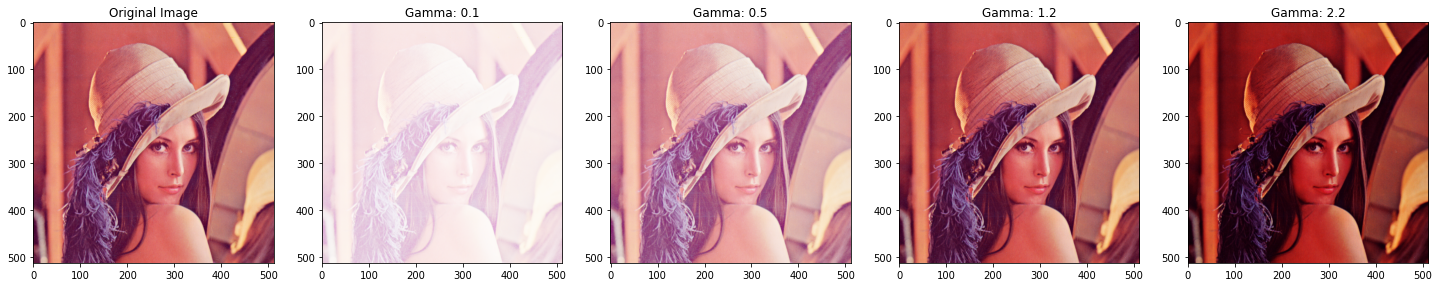

In [ ]:
import cv2
import numpy as np
  
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Data/Lenna.png") #read an image
img_filename = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert the original image to grayscale


gamma_values = [0, 0.1, 0.5, 1.2, 2.2]

fig = plt.figure(figsize=[25,40]) #specify the figure size

for i in range(len(gamma_values)): #loop through all values of gamma
  if i == 0:
    plt.subplot(1,5,i+1)
    plt.imshow(img_filename)    #show thw original image
    plt.title('Original Image')
  else:
    gamma_image = np.array(255*(img_filename/255) ** gamma_values[i], dtype = 'uint8') # create an array with power of gamma value
    plt.subplot(1,5,i+1)
    plt.imshow(gamma_image)     #show the gamma image
    plt.title('Gamma: '+str(gamma_values[i]))
    
